In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
# import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [3]:
df = pd.read_csv(r'D:\Desktop\Econometrics\Economics2020\DTP.csv')

In [25]:
df.columns

Index(['Country', 'CARS', 'DEV', 'LENTH', 'ALC', 'DTP'], dtype='object')

In [27]:
df.head()

,Country,CARS,DEV,LENTH,ALC,DTP
0,Afghanistan,27.00,0,65.096525,0.03,25.1
1,Albania,114.00,0,626.130513,7.29,9.3
2,Algeria,109.00,0,47.719314,0.69,14.5
3,Angola,40.28,0,41.252106,5.57,36.2
4,Argentina,332.84,0,83.622406,9.35,12.2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  144 non-null    object 
 1   CARS     144 non-null    float64
 2   DEV      144 non-null    int64  
 3   LENTH    144 non-null    float64
 4   ALC      144 non-null    float64
 5   DTP      144 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.9+ KB


In [29]:
df.describe(include = "all")

,Country,CARS,DEV,LENTH,ALC,DTP
count,144,144.000000,144.000000,144.000000,144.000000,144.000000
unique,144,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,220.559306,0.201389,736.577614,7.063403,18.321528
std,NaN,223.446556,0.402438,1243.905343,5.013670,10.832650
min,NaN,2.000000,0.000000,4.748963,0.030000,3.100000
25%,NaN,36.495000,0.000000,107.225340,3.087500,9.975000
50%,NaN,126.500000,0.000000,294.244072,6.445000,16.200000
75%,NaN,358.295000,0.000000,839.754679,10.202500,23.750000


In [30]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')


c:\Users\Stephen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DTP'>

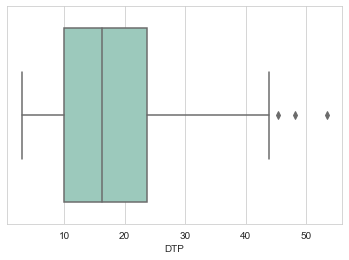

In [31]:
sns.boxplot(df['DTP'])

In [17]:
df.corr()


,CARS,DEV,LENTH,ALC,DTP
CARS,1.000000,0.782157,0.447642,0.462741,-0.517595
DEV,0.782157,1.000000,0.442658,0.338791,-0.520568
LENTH,0.447642,0.442658,1.000000,0.100435,-0.384747
ALC,0.462741,0.338791,0.100435,1.000000,-0.320431
DTP,-0.517595,-0.520568,-0.384747,-0.320431,1.000000


In [32]:
y = df['DTP']
x = df[['CARS',
        'LENTH',
        'ALC',
        'DEV']]
        
x = sm.add_constant(x)
x.head()

c:\Users\Stephen\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,CARS,LENTH,ALC,DEV
0,1.0,27.00,65.096525,0.03,0
1,1.0,114.00,626.130513,7.29,0
2,1.0,109.00,47.719314,0.69,0
3,1.0,40.28,41.252106,5.57,0
4,1.0,332.84,83.622406,9.35,0


In [33]:
model = sm.OLS(y, x) #Ordinary Least Squares
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DTP   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     17.64
Date:                Mon, 30 May 2022   Prob (F-statistic):           9.90e-12
Time:                        16:07:36   Log-Likelihood:                -517.36
No. Observations:                 144   AIC:                             1045.
Df Residuals:                     139   BIC:                             1060.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7645      1.384     17.892      0.000      22.028      27.501
CARS          -0.0082      0.006     -1.401      0.163      -0.020       0.003
LENTH         -0.0016      0.001     -2.265      0.025      -0.003      -0.000
ALC           -0.2917      0.170     -1.717      0.088      -0.628       0.044
DEV           -7.0926      3.027     -2.343      0.021     -13.077      -1.108
==============================================================================
Omnibus:                       16.129   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.632
Skew:                           0.740   Prob(JB):                     9.00e-05
Kurtosis:                       3.958   Cond. No.                     5.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

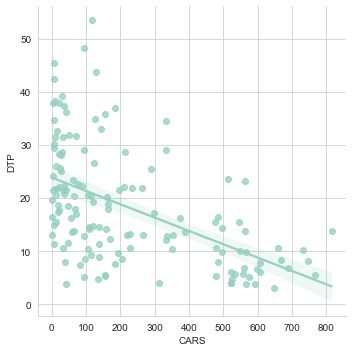

In [35]:
sns.lmplot(x='CARS', y = 'DTP', data=df)

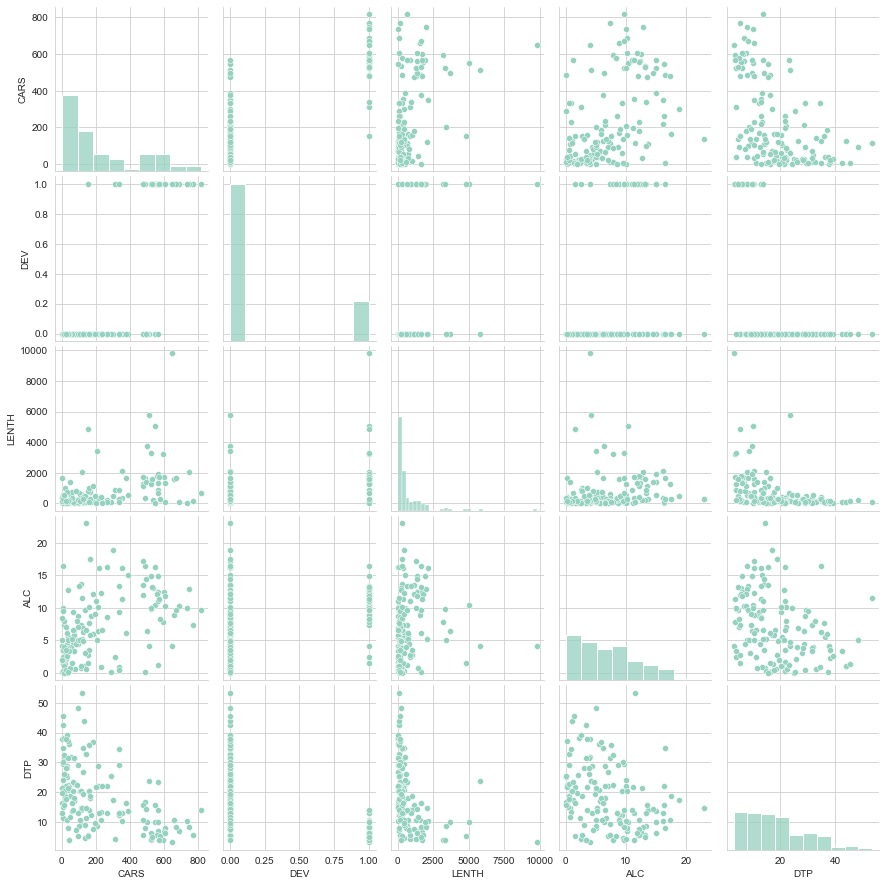

In [36]:
sns.pairplot(df)


In [45]:
y = df["DTP"]
x = df[["ALC",
    "DEV"]]

x = sm.add_constant(x)
x.head()

c:\Users\Stephen\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,ALC,DEV
0,1.0,0.03,0
1,1.0,7.29,0
2,1.0,0.69,0
3,1.0,5.57,0
4,1.0,9.35,0


In [46]:
model = sm.OLS(y, x) #Ordinary Least Squares
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DTP   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     29.42
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.10e-11
Time:                        16:25:19   Log-Likelihood:                -521.80
No. Observations:                 144   AIC:                             1050.
Df Residuals:                     141   BIC:                             1059.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3283      1.322     17.640      0.000      20.714      25.943
ALC           -0.3516      0.162     -2.165      0.032      -0.673      -0.030
DEV          -12.5283      2.024     -6.190      0.000     -16.529      -8.527
==============================================================================
Omnibus:                       17.921   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.057
Skew:                           0.804   Prob(JB):                     2.68e-05
Kurtosis:                       3.961   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
y = df["DTP"]
x = df[["ALC",
    "CARS",
    "LENTH",
    "DEV"]]

x = sm.add_constant(x)
x.head()

c:\Users\Stephen\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,ALC,CARS,LENTH,DEV
0,1.0,0.03,27.00,65.096525,0
1,1.0,7.29,114.00,626.130513,0
2,1.0,0.69,109.00,47.719314,0
3,1.0,5.57,40.28,41.252106,0
4,1.0,9.35,332.84,83.622406,0


In [49]:
model = sm.OLS(y, x) #Ordinary Least Squares
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DTP   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     17.64
Date:                Mon, 30 May 2022   Prob (F-statistic):           9.90e-12
Time:                        17:46:40   Log-Likelihood:                -517.36
No. Observations:                 144   AIC:                             1045.
Df Residuals:                     139   BIC:                             1060.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7645      1.384     17.892      0.000      22.028      27.501
ALC           -0.2917      0.170     -1.717      0.088      -0.628       0.044
CARS          -0.0082      0.006     -1.401      0.163      -0.020       0.003
LENTH         -0.0016      0.001     -2.265      0.025      -0.003      -0.000
DEV           -7.0926      3.027     -2.343      0.021     -13.077      -1.108
==============================================================================
Omnibus:                       16.129   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.632
Skew:                           0.740   Prob(JB):                     9.00e-05
Kurtosis:                       3.958   Cond. No.                     5.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
y = df["DTP"]
x = df[["ALC",
    "DEV"]]

x = sm.add_constant(x)
x.head()

c:\Users\Stephen\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,ALC,DEV
0,1.0,0.03,0
1,1.0,7.29,0
2,1.0,0.69,0
3,1.0,5.57,0
4,1.0,9.35,0


In [52]:
model = sm.OLS(y, x) #Ordinary Least Squares
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DTP   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     29.42
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.10e-11
Time:                        18:21:21   Log-Likelihood:                -521.80
No. Observations:                 144   AIC:                             1050.
Df Residuals:                     141   BIC:                             1059.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3283      1.322     17.640      0.000      20.714      25.943
ALC           -0.3516      0.162     -2.165      0.032      -0.673      -0.030
DEV          -12.5283      2.024     -6.190      0.000     -16.529      -8.527
==============================================================================
Omnibus:                       17.921   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.057
Skew:                           0.804   Prob(JB):                     2.68e-05
Kurtosis:                       3.961   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
y = df["DTP"]
x = df[["CARS",
    "LENTH",
    ]]

x = sm.add_constant(x)
x.head()

c:\Users\Stephen\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,CARS,LENTH
0,1.0,27.00,65.096525
1,1.0,114.00,626.130513
2,1.0,109.00,47.719314
3,1.0,40.28,41.252106
4,1.0,332.84,83.622406


In [54]:
model = sm.OLS(y, x) #Ordinary Least Squares
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DTP   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     29.81
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.59e-11
Time:                        18:22:03   Log-Likelihood:                -521.52
No. Observations:                 144   AIC:                             1049.
Df Residuals:                     141   BIC:                             1058.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1676      1.080     22.369      0.000      22.032      26.303
CARS          -0.0209      0.004     -5.471      0.000      -0.029      -0.013
LENTH         -0.0017      0.001     -2.424      0.017      -0.003      -0.000
==============================================================================
Omnibus:                       15.694   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.354
Skew:                           0.778   Prob(JB):                     0.000170
Kurtosis:                       3.687   Cond. No.                     2.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""